It is important to consider the steps that you, as an analyst, take when you first encounter a dataset after importing it into your workspace as a DataFrame. Is there a set of tasks that you usually undertake to first examine the data? Are you aware of all the possible data types? This chapter begins by covering the tasks you might want to undertake when first encountering a new dataseset. The chapter proceeds by answering common questions that are not that trivial to do in pandas.

## Recipes
* [Developing a data analysis routine](#Developing-a-data-analysis-routine)
* [Reducing memory by changing data types](#Reducing-memory-by-changing-data-types)
* [Selecting the smallest of the largest](#Selecting-the-smallest-of-the-largest)
* [Selecting the largest of each group by sorting](#Selecting-the-largest-of-each-group-by-sorting)
* [Duplicating nlargest with sort_values](#Duplicating-nlargest-with-sort_values)
* [Calculating a trailing stop order price](#Calculating-a-trailing-stop-order-price)

In [1]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 50

# Developing a data analysis routine

Although there is no standard approach when beginning a data analysis, it is typically a good idea to develop a routine for yourself when first examining a dataset. Similar to common routines that we have for waking up, showering, going to work, eating, and so on, a beginning data analysis routine helps one quickly get acquainted with a new dataset. This routine can manifest itself as a dynamic checklist of tasks that evolves as your familiarity with pandas and data analysis expands.

Exploratory Data Analysis (EDA) is a term used to encompass the entire process of analyzing data without the formal use of statistical testing procedures. Much of EDA involves visually displaying different relationships among the data to detect interesting patterns and develop hypotheses.

### Getting ready

This recipe covers a small but fundamental part of EDA: the collection of metadata and univariate descriptive statistics in a routine and systematic way. It outlines a common set of tasks that can be undertaken when first importing any dataset as a pandas DataFrame. This recipe may help form the basis of the routine that you can implement when first examining a dataset.

**Note**

Metadata describes the dataset, or more aptly, data about the data. Examples of metadata include the number of columns/rows, column names, data types of each column, the source of the dataset, the date of collection, the acceptable values for different columns, and so on. Univariate descriptive statistics are summary statistics about individual variables (columns) of the dataset, independent of all other variables.

### How to do it...

First, some metadata on the college dataset will be collected, followed by basic summary statistics of each column:

Read in the dataset, and view the first five rows with the head method:

In [2]:
college = pd.read_csv('data/college.csv')

In [3]:
college.head()

,INSTNM,CITY,STABBR,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GRAD_DEBT_MDN_SUPP
0,Alabama A & M University,Normal,AL,1.0,0.0,0.0,0,424.0,420.0,0.0,4206.0,0.0333,0.9353,0.0055,0.0019,0.0024,0.0019,0.0000,0.0059,0.0138,0.0656,1,0.7356,0.8284,0.1049,30300,33888
1,University of Alabama at Birmingham,Birmingham,AL,0.0,0.0,0.0,0,570.0,565.0,0.0,11383.0,0.5922,0.2600,0.0283,0.0518,0.0022,0.0007,0.0368,0.0179,0.0100,0.2607,1,0.3460,0.5214,0.2422,39700,21941.5
2,Amridge University,Montgomery,AL,0.0,0.0,0.0,1,NaN,NaN,1.0,291.0,0.2990,0.4192,0.0069,0.0034,0.0000,0.0000,0.0000,0.0000,0.2715,0.4536,1,0.6801,0.7795,0.8540,40100,23370
3,University of Alabama in Huntsville,Huntsville,AL,0.0,0.0,0.0,0,595.0,590.0,0.0,5451.0,0.6988,0.1255,0.0382,0.0376,0.0143,0.0002,0.0172,0.0332,0.0350,0.2146,1,0.3072,0.4596,0.2640,45500,24097
4,Alabama State University,Montgomery,AL,1.0,0.0,0.0,0,425.0,430.0,0.0,4811.0,0.0158,0.9208,0.0121,0.0019,0.0010,0.0006,0.0098,0.0243,0.0137,0.0892,1,0.7347,0.7554,0.1270,26600,33118.5


Get the dimensions of the DataFrame with the shape attribute:

In [4]:
college.shape

(7535, 27)

In [7]:
college.describe()

,HBCU,MENONLY,WOMENONLY,RELAFFIL,SATVRMID,SATMTMID,DISTANCEONLY,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,PPTUG_EF,CURROPER,PCTPELL,PCTFLOAN,UG25ABV
count,7164.000000,7164.000000,7164.000000,7535.000000,1185.000000,1196.000000,7164.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6874.000000,6853.000000,7535.000000,6849.000000,6849.000000,6718.000000
mean,0.014238,0.009213,0.005304,0.190975,522.819409,530.765050,0.005583,2356.837940,0.510207,0.189997,0.161635,0.033544,0.013813,0.004569,0.023950,0.016086,0.045181,0.226639,0.923291,0.530643,0.522211,0.410021
std,0.118478,0.095546,0.072642,0.393096,68.578862,73.469767,0.074519,5474.275871,0.286958,0.224587,0.221854,0.073777,0.070196,0.033125,0.031288,0.050172,0.093440,0.246470,0.266146,0.225544,0.283616,0.228939
min,0.000000,0.000000,0.000000,0.000000,290.000000,310.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,475.000000,482.000000,0.000000,117.000000,0.267500,0.036125,0.027600,0.002500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.357800,0.332900,0.241500
50%,0.000000,0.000000,0.000000,0.000000,510.000000,520.000000,0.000000,412.500000,0.555700,0.100050,0.071400,0.012900,0.002600,0.000000,0.017500,0.000000,0.014300,0.150400,1.000000,0.521500,0.583300,0.400750
75%,0.000000,0.000000,0.000000,0.000000,555.000000,565.000000,0.000000,1929.500000,0.747875,0.257700,0.198875,0.032700,0.007300,0.002500,0.033900,0.011700,0.045400,0.376900,1.000000,0.712900,0.745000,0.572275
max,1.000000,1.000000,1.000000,1.000000,765.000000,785.000000,1.000000,151558.000000,1.000000,1.000000,1.000000,0.972700,1.000000,0.998300,0.533300,0.928600,0.902700,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
#The above data is hard to read. Lets transpose the data

In [9]:
with pd.option_context('display.max_rows', 8):
    display(college.describe(include=[np.number]).T)

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.0000,0.00000,0.000000,1.0
MENONLY,7164.0,0.009213,0.095546,0.0,0.0000,0.00000,0.000000,1.0
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.0000,0.00000,0.000000,1.0
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.0000,0.00000,0.000000,1.0
...,...,...,...,...,...,...,...,...
CURROPER,7535.0,0.923291,0.266146,0.0,1.0000,1.00000,1.000000,1.0
PCTPELL,6849.0,0.530643,0.225544,0.0,0.3578,0.52150,0.712900,1.0
PCTFLOAN,6849.0,0.522211,0.283616,0.0,0.3329,0.58330,0.745000,1.0
UG25ABV,6718.0,0.410021,0.228939,0.0,0.2415,0.40075,0.572275,1.0


List the data type of each column, number of non-missing values, and memory usage with the infomethod:

In [6]:
college.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7535 entries, 0 to 7534
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INSTNM              7535 non-null   object 
 1   CITY                7535 non-null   object 
 2   STABBR              7535 non-null   object 
 3   HBCU                7164 non-null   float64
 4   MENONLY             7164 non-null   float64
 5   WOMENONLY           7164 non-null   float64
 6   RELAFFIL            7535 non-null   int64  
 7   SATVRMID            1185 non-null   float64
 8   SATMTMID            1196 non-null   float64
 9   DISTANCEONLY        7164 non-null   float64
 10  UGDS                6874 non-null   float64
 11  UGDS_WHITE          6874 non-null   float64
 12  UGDS_BLACK          6874 non-null   float64
 13  UGDS_HISP           6874 non-null   float64
 14  UGDS_ASIAN          6874 non-null   float64
 15  UGDS_AIAN           6874 non-null   float64
 16  UGDS_N

Get summary statistics for the numerical columns and transpose the DataFrame for more readable output:

In [10]:
college.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.0000
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.0000
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.0000
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.0000
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,765.0000
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,785.0000
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.0000
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,151558.0000
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.0000
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.0000


Get summary statistics for the object and categorical columns:

In [15]:
college.describe(include=[object, pd.Categorical]).T #for non-numerical data, describe returns count, unique values, top value and its frequency

,count,unique,top,freq
INSTNM,7535,7535,Alabama A & M University,1
CITY,7535,2514,New York,87
STABBR,7535,59,CA,773
MD_EARN_WNE_P10,6413,598,PrivacySuppressed,822
GRAD_DEBT_MDN_SUPP,7503,2038,PrivacySuppressed,1510


After importing your dataset, a common task is to print out the first few rows of the DataFrame for manual inspection with the head method. The shape attribute returns the first piece of metadata, a tuple containing the number of rows and columns.

The primary method to get the most metadata at once is the info method. It provides each column name, the number of non-missing values, the data type of each column, and the approximate memory usage of the DataFrame. For all DataFrames, columns values are always one data type. The same holds for relational databases. DataFrames, as a whole, might be composed of columns with different data types.

**Note**

Internally, pandas stores columns of the same data type together in blocks. For a deeper dive into pandas internals, see Jeff Tratner's slides (http://bit.ly/2xHIv1g).

Step 4 and step 5 produce univariate descriptive statistics on different types of columns. The powerful describe method produces different output based on the data types provided to the include parameter. By default, describe outputs a summary for all the numeric (mostly continuous) columns and silently drops any categorical columns. You may use np.number or the string number to include both integers and floats in the summary. Technically, the data types are part of a hierarchy where number resides above integers and floats. Take a look at the following diagram to understand the NumPy data type hierarchy better:

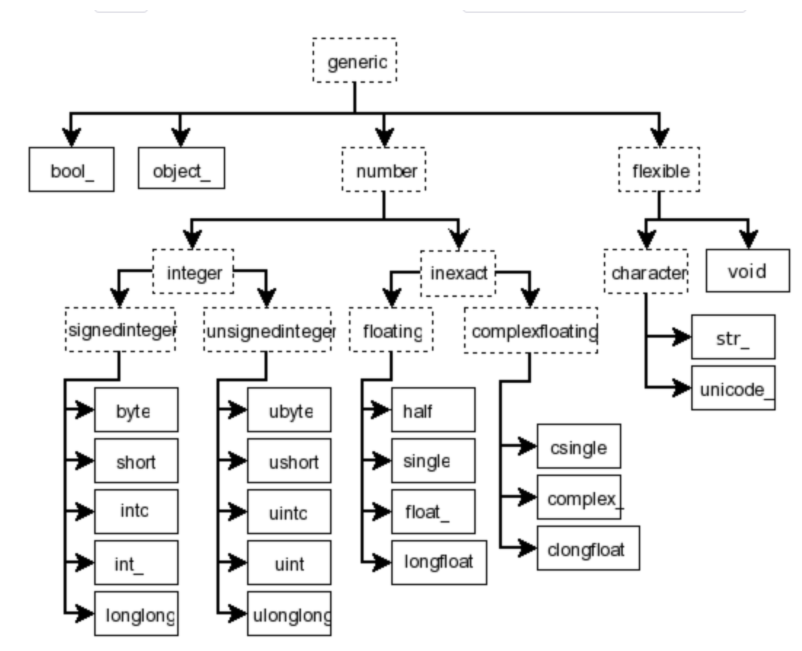

**Note**

Broadly speaking, we can classify data as being either continuous or categorical. Continuous data is always numeric and can usually take on an infinite number of possibilities such as height, weight, and salary. Categorical data represents discrete values that take on a finite number of possibilities such as ethnicity, employment status, and car color. Categorical data can be represented numerically or with characters.

Categorical columns are usually going to be either of type np.object or pd.Categorical. Step 5 ensures that both of these types are represented. In both step 4 and step 5, the output DataFrame is transposed with the T attribute. This eases readability for DataFrames with many columns.

### There's more...

It is possible to specify the exact quantiles returned from the describe method when used with numeric columns:



In [22]:
with pd.option_context('display.max_rows', 5):
    display(college.describe(include=[np.number], 
                 percentiles=[.01, .05, .10, .25, .5, .75, .9, .95, .99]).T)

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.0000,0.0000,0.0000,0.0000,0.00000,0.000000,0.00000,0.00000,1.000000,1.0
MENONLY,7164.0,0.009213,0.095546,0.0,0.0000,0.0000,0.0000,0.0000,0.00000,0.000000,0.00000,0.00000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PCTFLOAN,6849.0,0.522211,0.283616,0.0,0.0000,0.0000,0.0000,0.3329,0.58330,0.745000,0.84752,0.89792,0.986368,1.0
UG25ABV,6718.0,0.410021,0.228939,0.0,0.0025,0.0374,0.0899,0.2415,0.40075,0.572275,0.72666,0.80000,0.917383,1.0


### Data dictionaries
A crucial part of a data analysis involves creating and maintaining a data dictionary. A data dictionary is a table of metadata and notes on each column of data. One of the primary purposes of a data dictionary is to explain the meaning of the column names. The college dataset uses a lot of abbreviations that are likely to be unfamiliar to an analyst who is inspecting it for the first time.

A data dictionary for the college dataset is provided in the following college_data_dictionary.csv file:

In [24]:
college_dd = pd.read_csv('data/college_data_dictionary.csv')

In [25]:
with pd.option_context('display.max_rows', 8):
    display(college_dd)

,column_name,description
0,INSTNM,Institution Name
1,CITY,City Location
2,STABBR,State Abbreviation
3,HBCU,Historically Black College or University
...,...,...
23,PCTFLOAN,Percent Students with federal loan
24,UG25ABV,Percent Students Older than 25
25,MD_EARN_WNE_P10,Median Earnings 10 years after enrollment
26,GRAD_DEBT_MDN_SUPP,Median debt of completers


As you can see, it is immensely helpful in deciphering the abbreviated column names. DataFrames are actually not the best place to store data dictionaries. A platform such as Excel or Google Sheets with easy ability to edit values and append columns is a better choice. Minimally, a column to keep track of notes on the data should be included in a data dictionary. A data dictionary is one of the first things that you can share as an analyst to collaborators.

It will often be the case that the dataset you are working with originated from a database whose administrators you will have to contact in order to get more information. Formal electronic databases generally have more formal representations of their data, called schemas. If possible, attempt to investigate your dataset with people who have expert knowledge on its design.

# Reducing memory by changing data types

Pandas does not broadly classify data as either continuous or categorical but has precise technical definitions for many distinct data types.

### Getting ready

This recipe changes the data type of one of the object columns from the college dataset to the special pandas Categorical data type to drastically reduce its memory usage.

### How to do it...

After reading in our college dataset, we select a few columns of different data types that will clearly show how much memory may be saved:

There is no need to use 64 bits for the RELAFFIL column as it contains only 0/1 values. Let's convert this column to an 8-bit (1 byte) integer with the astype method:

In [40]:
import pandas as pd
import numpy as np
college = pd.read_csv('data/college.csv')
college['RELAFFIL'] = college['RELAFFIL'].astype(np.int8)

Inspect the data types of each column:

In [41]:
college.dtypes

INSTNM                 object
CITY                   object
STABBR                 object
HBCU                  float64
MENONLY               float64
WOMENONLY             float64
RELAFFIL                 int8
SATVRMID              float64
SATMTMID              float64
DISTANCEONLY          float64
UGDS                  float64
UGDS_WHITE            float64
UGDS_BLACK            float64
UGDS_HISP             float64
UGDS_ASIAN            float64
UGDS_AIAN             float64
UGDS_NHPI             float64
UGDS_2MOR             float64
UGDS_NRA              float64
UGDS_UNKN             float64
PPTUG_EF              float64
CURROPER                int64
PCTPELL               float64
PCTFLOAN              float64
UG25ABV               float64
MD_EARN_WNE_P10        object
GRAD_DEBT_MDN_SUPP     object
dtype: object

In [42]:
#count number of columns with a specific data type
college.dtypes.value_counts()

float64    20
object      5
int8        1
int64       1
Name: count, dtype: int64

Find the memory usage of each column with the memory_usage method:

In [43]:
original_mem =college.memory_usage(deep=True) #memory usage of each column
original_mem

Index                    128
INSTNM                660240
CITY                  496019
STABBR                444565
HBCU                   60280
MENONLY                60280
WOMENONLY              60280
RELAFFIL                7535
SATVRMID               60280
SATMTMID               60280
DISTANCEONLY           60280
UGDS                   60280
UGDS_WHITE             60280
UGDS_BLACK             60280
UGDS_HISP              60280
UGDS_ASIAN             60280
UGDS_AIAN              60280
UGDS_NHPI              60280
UGDS_2MOR              60280
UGDS_NRA               60280
UGDS_UNKN              60280
PPTUG_EF               60280
CURROPER               60280
PCTPELL                60280
PCTFLOAN               60280
UG25ABV                60280
MD_EARN_WNE_P10       443397
GRAD_DEBT_MDN_SUPP    484160
dtype: int64

To save even more memory, you will want to consider changing object data types to categorical if they have a reasonably low cardinality (number of unique values). Let's first check the number of unique values for both the object columns:


In [44]:
college.select_dtypes(include=['object']).nunique() #unique values in each column with object data type

INSTNM                7535
CITY                  2514
STABBR                  59
MD_EARN_WNE_P10        598
GRAD_DEBT_MDN_SUPP    2038
dtype: int64

The STABBR column is a good candidate to convert to Categorical as less than one percent of its values are unique:


In [45]:
college['STABBR'] = college['STABBR'].astype('category')
college.dtypes

INSTNM                  object
CITY                    object
STABBR                category
HBCU                   float64
MENONLY                float64
WOMENONLY              float64
RELAFFIL                  int8
SATVRMID               float64
SATMTMID               float64
DISTANCEONLY           float64
UGDS                   float64
UGDS_WHITE             float64
UGDS_BLACK             float64
UGDS_HISP              float64
UGDS_ASIAN             float64
UGDS_AIAN              float64
UGDS_NHPI              float64
UGDS_2MOR              float64
UGDS_NRA               float64
UGDS_UNKN              float64
PPTUG_EF               float64
CURROPER                 int64
PCTPELL                float64
PCTFLOAN               float64
UG25ABV                float64
MD_EARN_WNE_P10         object
GRAD_DEBT_MDN_SUPP      object
dtype: object

Compute the memory usage again:

In [46]:
new_mem = college.memory_usage(deep=True)
new_mem

Index                    128
INSTNM                660699
CITY                  496045
STABBR                 13120
HBCU                   60280
MENONLY                60280
WOMENONLY              60280
RELAFFIL                7535
SATVRMID               60280
SATMTMID               60280
DISTANCEONLY           60280
UGDS                   60280
UGDS_WHITE             60280
UGDS_BLACK             60280
UGDS_HISP              60280
UGDS_ASIAN             60280
UGDS_AIAN              60280
UGDS_NHPI              60280
UGDS_2MOR              60280
UGDS_NRA               60280
UGDS_UNKN              60280
PPTUG_EF               60280
CURROPER               60280
PCTPELL                60280
PCTFLOAN               60280
UG25ABV                60280
MD_EARN_WNE_P10       443397
GRAD_DEBT_MDN_SUPP    484160
dtype: int64

Finally, let's compare the original memory usage with our updated memory usage. The RELAFFIL column is, as expected, an eighth of its original, while the STABBR column has shrunk to just three percent of its original size:

In [47]:
new_mem / original_mem

Index                 1.000000
INSTNM                1.000695
CITY                  1.000052
STABBR                0.029512
HBCU                  1.000000
MENONLY               1.000000
WOMENONLY             1.000000
RELAFFIL              1.000000
SATVRMID              1.000000
SATMTMID              1.000000
DISTANCEONLY          1.000000
UGDS                  1.000000
UGDS_WHITE            1.000000
UGDS_BLACK            1.000000
UGDS_HISP             1.000000
UGDS_ASIAN            1.000000
UGDS_AIAN             1.000000
UGDS_NHPI             1.000000
UGDS_2MOR             1.000000
UGDS_NRA              1.000000
UGDS_UNKN             1.000000
PPTUG_EF              1.000000
CURROPER              1.000000
PCTPELL               1.000000
PCTFLOAN              1.000000
UG25ABV               1.000000
MD_EARN_WNE_P10       1.000000
GRAD_DEBT_MDN_SUPP    1.000000
dtype: float64

Pandas defaults integer and float data types to 64 bits regardless of the maximum necessary size for the particular DataFrame. Integers, floats, and even booleans may be coerced to a different data type with the astype method and passing it the exact type, either as a string or specific object, as done in step 4.

The RELAFFIL column is a good choice to cast to a smaller integer type as the data dictionary explains that its values must be 0/1. The memory for RELAFFIL is now an eighth of CURROPER, which remains as its former type.

**Note**

The memory units displayed are in bytes and not bits. One byte is equivalent to 8 bits, so when RELAFFIL was changed to an 8-bit integer, it uses one 1 byte of memory and as there are 7,535 rows, its memory footprint is equivalent to 7,535 bytes.

Columns that are object data type, such as INSTNM, are not like the other pandas data types. For all the other pandas data types, each value in that column is the same data type. For instance, when a column has the int64 type, every individual column value is also int64. This is not true for columns that are object data type. Each individual column value can be of any type. Object data types can have a mix of strings, numerics, datetimes, or even other Python objects such as lists or tuples. For this reason, the object data type is sometimes referred to as a catch-all for a column of data that doesn't match any of the other data types. The vast majority of the time, though, object data type columns will all be strings.

**Note**

Relational database management systems such as Microsoft's SQL Server or PostgreSQL have specific data types for characters such as varchar, text, or nchar that also usually specify a maximum number of characters. Pandas object data type is a much broader data type. Every value in an object column can be of any data type.

Therefore, the memory of each individual value in an object data type column is inconsistent. There is no predefined amount of memory for each value like the other data types. For pandas to extract the exact amount of memory of an object data type column, the deep parameter must be set to True in the memory_usage method.

Object columns are targets for the largest memory savings. Pandas has an additional categorical data type that is not available in NumPy. When converting to category, pandas internally creates a mapping from integers to each unique string value. Thus, each string only needs to be kept a single time in memory. As you can see, this simple change of data type reduced memory usage by 97%.

You might also have noticed that the index uses an extremely low amount of memory. If no index is specified during DataFrame creation, as is the case in this recipe, pandas defaults the index to a RangeIndex. The RangeIndex is very similar to the built-in range function. It produces values on demand and only stores the minimum amount of information needed to create an index.

### There's more...

To get a better idea of how object data type columns differ from integers and floats, a single value from each one of these columns can be modified and the resulting memory usage displayed. The CURROPER and INSTNM columns are of int64 and object types, respectively:

In [63]:
college = pd.read_csv('data/college.csv')

In [64]:
college[['CURROPER', 'INSTNM']].memory_usage(deep=True)

Index          128
CURROPER     60280
INSTNM      660240
dtype: int64

In [65]:
college.loc[0, 'CURROPER'] = 10000000
college.loc[0, 'INSTNM'] = college.loc[0, 'INSTNM'] + 'a'
# college.loc[1, 'INSTNM'] = college.loc[1, 'INSTNM'] + 'a'
college[['CURROPER', 'INSTNM']].memory_usage(deep=True)

Index          128
CURROPER     60280
INSTNM      660241
dtype: int64

Memory usage for CURROPER remained the same since a 64-bit integer is more than enough space for the larger number. On the other hand, the memory usage for INSTNM increased by 105 bytes by just adding a single letter to one value.

**Note**

Python 3 uses Unicode, a standardized character representation intended to encode all the world's writing systems. Unicode uses up to 4 bytes per character. It seems that pandas has some overhead (100 bytes) when making the first modification to a character value. Afterward, increments of 5 bytes per character are sustained.

Not all columns can be coerced to the desired type. Take a look at the MENONLY column, which from the data dictionary appears to contain only 0/1 values. The actual data type of this column upon import unexpectedly turns out to be float64. The reason for this is that there happen to be missing values, denoted by np.nan. There is no integer representation for missing values. Any numeric column with even a single missing value must be a float. Furthermore, any column of an integer data type will automatically be coerced to a float if one of the values becomes missing:

In [66]:
college['MENONLY'].dtype

dtype('float64')

In [67]:
college['MENONLY'].astype('int8') # ValueError: Cannot convert non-finite values (NA or inf) to integer

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

Additionally, it is possible to substitute string names in place of Python objects when referring to data types. For instance, when using the include parameter in the describe DataFame method, it is possible to pass a list of either the formal object NumPy/pandas object or their equivalent string representation. These are available in the table at the beginning of the Selecting columns with methods recipe in Chapter 2, Essential DataFrame Operations,. For instance, each of the following produces the same result:



In [68]:
college.describe(include=['int64', 'float64']).T #using string names to filter datatypes

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.000000e+00
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.000000e+00
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.000000e+00
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.000000e+00
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,7.650000e+02
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,7.850000e+02
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.000000e+00
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,1.515580e+05
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.000000e+00
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.000000e+00


In [69]:
college.describe(include=[np.int64, np.float64]).T ##using numpy names to filter datatypes

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.000000e+00
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.000000e+00
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.000000e+00
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.000000e+00
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,7.650000e+02
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,7.850000e+02
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.000000e+00
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,1.515580e+05
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.000000e+00
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.000000e+00


These strings can be similarly used when changing types:

In [70]:
college['RELAFFIL'] = college['RELAFFIL'].astype(np.int8) #convert RELAFFIL column to int8

In [71]:
college.describe(include=['int', 'float']).T  # defaults to 64 bit int/floats

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.000000e+00
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.000000e+00
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.000000e+00
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,7.650000e+02
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,7.850000e+02
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.000000e+00
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,1.515580e+05
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.000000e+00
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.000000e+00
UGDS_HISP,6874.0,0.161635,0.221854,0.0,0.027600,0.07140,0.198875,1.000000e+00


In [72]:
college.describe(include=['number']).T  # also works as the default int/float are 64 bits

,count,mean,std,min,25%,50%,75%,max
HBCU,7164.0,0.014238,0.118478,0.0,0.000000,0.00000,0.000000,1.000000e+00
MENONLY,7164.0,0.009213,0.095546,0.0,0.000000,0.00000,0.000000,1.000000e+00
WOMENONLY,7164.0,0.005304,0.072642,0.0,0.000000,0.00000,0.000000,1.000000e+00
RELAFFIL,7535.0,0.190975,0.393096,0.0,0.000000,0.00000,0.000000,1.000000e+00
SATVRMID,1185.0,522.819409,68.578862,290.0,475.000000,510.00000,555.000000,7.650000e+02
SATMTMID,1196.0,530.765050,73.469767,310.0,482.000000,520.00000,565.000000,7.850000e+02
DISTANCEONLY,7164.0,0.005583,0.074519,0.0,0.000000,0.00000,0.000000,1.000000e+00
UGDS,6874.0,2356.837940,5474.275871,0.0,117.000000,412.50000,1929.500000,1.515580e+05
UGDS_WHITE,6874.0,0.510207,0.286958,0.0,0.267500,0.55570,0.747875,1.000000e+00
UGDS_BLACK,6874.0,0.189997,0.224587,0.0,0.036125,0.10005,0.257700,1.000000e+00


In [73]:
college['MENONLY'] = college['MENONLY'].astype('float16')
college['RELAFFIL'] = college['RELAFFIL'].astype('int8')

# Selecting the smallest of the largest

This recipe can be used to create catchy news headlines such as Out of the top 100 best universities, these 5 have the lowest tuition or From the top 50 cities to live, these 10 are the most affordable. During an analysis, it is possible that you will first need to find a grouping of data that contains the top n values in a single column and, from this subset, find the bottom m values based on a different column.

In this recipe, we find the five lowest budget movies from the top 100 scoring movies by taking advantage of the convenience methods, nlargest and nsmallest

In [79]:
movie = pd.read_csv('data/imdb5000.csv')
movie2 = movie[['movie_title', 'imdb_score', 'budget']]
movie2.head()

,movie_title,imdb_score,budget
0,Avatar,7.9,237000000.0
1,Pirates of the Caribbean: At World's End,7.1,300000000.0
2,Spectre,6.8,245000000.0
3,The Dark Knight Rises,8.5,250000000.0
4,Star Wars: Episode VII - The Force Awakens,7.1,NaN


Use the nlargest method to select the top 100 movies by imdb_score:

In [80]:
movie2.nlargest(100, 'imdb_score').head()

,movie_title,imdb_score,budget
2765,Towering Inferno,9.5,NaN
1937,The Shawshank Redemption,9.3,25000000.0
3466,The Godfather,9.2,6000000.0
2824,Dekalog,9.1,NaN
3207,Dekalog,9.1,NaN


Chain the nsmallest method to return the five lowest budget films among those with a top 100 score:

In [81]:
movie2.nlargest(100, 'imdb_score').nsmallest(5, 'budget')

,movie_title,imdb_score,budget
4924,Butterfly Girl,8.7,180000.0
4921,Children of Heaven,8.5,180000.0
4822,12 Angry Men,8.9,350000.0
4659,A Separation,8.4,500000.0
2242,Psycho,8.5,806947.0


The first parameter of the nlargest method, n, must be an integer and selects the number of rows to be returned. The second parameter, columns, takes a column name as a string. Step 2 returns the 100 highest scoring movies. We could have saved this intermediate result as its own variable but instead, we chain the nsmallest method to it in step 3, which returns exactly five rows, sorted by budget.

### There's more...

It is possible to pass a list of column names to the columns parameter of the nlargest/nsmallest methods. This would only be useful to break ties in the event that there were duplicate values sharing the nth ranked spot in the first column in the list.

# Selecting the largest of each group by sorting
One of the most basic and common operations to perform during a data analysis is to select rows containing the largest value of some column within a group. For instance, this would be like finding the highest rated film of each year or the highest grossing film by content rating. To accomplish this task, we need to sort the groups as well as the column used to rank each member of the group, and then extract the highest member of each group.

Read in the movie dataset and slim it down to just the three columns we care about, movie_title, title_year, and imdb_score:

In [82]:
movie = pd.read_csv('data/imdb5000.csv')
movie2 = movie[['movie_title', 'title_year', 'imdb_score']]

Use the sort_values method to sort the DataFrame by title_year. The default behavior sorts from the smallest to largest. Use the ascending parameter to invert this behavior by setting it equal to True:

In [83]:
movie2.sort_values('title_year', ascending=False).head()

,movie_title,title_year,imdb_score
2366,Fight Valley,2016.0,5.0
3817,Yoga Hosers,2016.0,4.8
1367,The 5th Wave,2016.0,5.2
1742,The Boss,2016.0,5.3
519,The Secret Life of Pets,2016.0,6.8


Notice how only the year was sorted. To sort multiple columns at once, use a list. Let's look at how to sort both year and score:

In [84]:
movie3 = movie2.sort_values(['title_year','imdb_score'], ascending=False)
movie3.head()

,movie_title,title_year,imdb_score
4409,Kickboxer: Vengeance,2016.0,9.1
4372,A Beginner's Guide to Snuff,2016.0,8.7
3870,Airlift,2016.0,8.5
27,Captain America: Civil War,2016.0,8.2
98,Godzilla Resurgence,2016.0,8.2


Now, we use the drop_duplicates method to keep only the first row of every year:

In [86]:
movie_top_year = movie3.drop_duplicates(subset='title_year') #We don;t have any duplicates if we take all columns
#But since we are interested in top one for each year, we can specify a subset and drop duplicates 
movie_top_year.head()

,movie_title,title_year,imdb_score
4409,Kickboxer: Vengeance,2016.0,9.1
3816,Running Forever,2015.0,8.6
4468,Queen of the Mountains,2014.0,8.7
4017,"Batman: The Dark Knight Returns, Part 2",2013.0,8.4
3,The Dark Knight Rises,2012.0,8.5


In step 1, we slim the dataset down to concentrate on only the columns of importance. This recipe would work the same with the entire DataFrame. Step 2 shows how to sort a DataFrame by a single column, which is not exactly what we wanted. Step 3 sorts multiple columns at the same time. It works by first sorting all of title_year and then, within each distinct value of title_year, sorts by imdb_score.

The default behavior of the drop_duplicates method is to keep the first occurrence of each unique row, which would not drop any rows as each row is unique. However, the subset parameter alters it to only consider the column (or list of columns) given to it. In this example, only one row for each year will be returned. As we sorted by year and score in the last step, the highest scoring movie for each year is what we get.

### There's more...

It is possible to sort one column in ascending order while simultaneously sorting another column in descending order. To accomplish this, pass in a list of booleans to the ascending parameter that corresponds to how you would like each column sorted. The following sorts title_year and content_rating in descending order and budget in ascending order. It then finds the lowest budget film for each year and content rating group:



In [87]:
movie4 = movie[['movie_title', 'title_year', 'content_rating', 'budget']]
movie4_sorted = movie4.sort_values(['title_year', 'content_rating', 'budget'], 
                                   ascending=[False, False, True])
movie4_sorted.drop_duplicates(subset=['title_year', 'content_rating']).head(10)

,movie_title,title_year,content_rating,budget
4108,Compadres,2016.0,R,3000000.0
4772,Fight to the Finish,2016.0,PG-13,150000.0
4775,Rodeo Girl,2016.0,PG,500000.0
3309,The Wailing,2016.0,Not Rated,NaN
4773,Alleluia! The Devil's Carnival,2016.0,NaN,500000.0
4848,Bizarre,2015.0,Unrated,500000.0
821,The Ridiculous 6,2015.0,TV-14,NaN
4956,The Gallows,2015.0,R,100000.0
4948,Romantic Schemer,2015.0,PG-13,125000.0
3868,R.L. Stine's Monsterville: The Cabinet of Souls,2015.0,PG,4400000.0


`By default, drop_duplicates keeps the very first appearance, but this behavior may be modified by passing the keep parameter last to select the last row of each group or False to drop all duplicates entirely.`

# Duplicating nlargest with sort_values

The previous two recipes work similarly by sorting values in slightly different manners. Finding the top n values of a column of data is equivalent to sorting the entire column descending and taking the first n values. Pandas has many operations that are capable of doing this in a variety of ways.

### Getting ready

In this recipe, we will replicate the Selecting the smallest from the largest recipe with the sort_values method and explore the differences between the two.

In [88]:
movie = pd.read_csv('data/imdb5000.csv')
movie2 = movie[['movie_title', 'imdb_score', 'budget']]
movie_smallest_largest = movie2.nlargest(100, 'imdb_score').nsmallest(5, 'budget')
movie_smallest_largest

,movie_title,imdb_score,budget
4924,Butterfly Girl,8.7,180000.0
4921,Children of Heaven,8.5,180000.0
4822,12 Angry Men,8.9,350000.0
4659,A Separation,8.4,500000.0
2242,Psycho,8.5,806947.0


Use sort_values to replicate the first part of the expression and grab the first 100 rows with the head method:

In [89]:
movie2.sort_values('imdb_score', ascending=False).head(100).head()

,movie_title,imdb_score,budget
2765,Towering Inferno,9.5,NaN
1937,The Shawshank Redemption,9.3,25000000.0
3466,The Godfather,9.2,6000000.0
4409,Kickboxer: Vengeance,9.1,17000000.0
2824,Dekalog,9.1,NaN


Now that we have the top 100 scoring movies, we can use sort_values with head again to grab the lowest five by budget:

In [90]:
movie2.sort_values('imdb_score', ascending=False).head(100).sort_values('budget').head()

,movie_title,imdb_score,budget
4937,A Charlie Brown Christmas,8.4,150000.0
4924,Butterfly Girl,8.7,180000.0
4921,Children of Heaven,8.5,180000.0
4822,12 Angry Men,8.9,350000.0
4659,A Separation,8.4,500000.0


The sort_valuesmethod can nearly replicate nlargest by chaining the head method after the operation, as seen in step 2. Step 3 replicates nsmallest by chaining another sort_values and completes the query by taking just the first five rows with the head method.

Take a look at the output from the first DataFrame from step 1 and compare it with the output from step 3. Are they the same? No! What happened? To understand why the two results are not equivalent, let's look at the tail of the intermediate steps of each recipe:

In [91]:
movie2.nlargest(100, 'imdb_score').tail()

,movie_title,imdb_score,budget
4017,"Batman: The Dark Knight Returns, Part 2",8.4,3500000.0
4105,Oldboy,8.4,3000000.0
4253,To Kill a Mockingbird,8.4,2000000.0
4496,Reservoir Dogs,8.4,1200000.0
4659,A Separation,8.4,500000.0


In [92]:
movie2.sort_values('imdb_score', ascending=False).head(100).tail()

,movie_title,imdb_score,budget
3849,Requiem for a Dream,8.4,4500000.0
3623,Veronica Mars,8.4,NaN
3685,Rang De Basanti,8.4,NaN
2362,The Shining,8.4,19000000.0
3807,Psych,8.4,NaN


The issue arises because more than 100 movies exist with a rating of at least 8.4. Each of the methods, nlargest and sort_values, breaks ties differently, which results in a slightly different 100-row DataFrame. 

### There's more...

If you look at the nlargest documentation, you will see that the keep parameter has three possible values, first, last, and False. From my knowledge of other pandas methods, keep=False should allow all ties to remain part of the result. Unfortunately, pandas raises an error when attempting to do this.